In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd  
import seaborn as sns
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer
import matplotlib.dates as mdates
%matplotlib inline

In [9]:
# Calculate the Mean Absolute Percentage Error (MAPE) for training and testing data
def calculate_mape(y_true, y_pred):
    return (100 * abs((y_true - y_pred) / y_true)).mean()

In [26]:
df_imputed = pd.read_csv("caiso_weekly_fuel_mix_and_load_imputed_GWh.csv", parse_dates=["Week_Start", "Week_End"])

In [27]:
solar_data_imp = df_imputed[['Week_Start', 'Solar']]
wind_data_imp = df_imputed[['Week_Start', 'Wind']]
geothermal_data_imp = df_imputed[['Week_Start', 'Geothermal']]
biomass_data_imp = df_imputed[['Week_Start', 'Biomass']]
biogas_data_imp = df_imputed[['Week_Start', 'Biogas']]
small_hydro_data_imp = df_imputed[['Week_Start', 'Small Hydro']]
coal_data_imp = df_imputed[['Week_Start', 'Coal']]
nuclear_data_imp = df_imputed[['Week_Start', 'Nuclear']]
natural_gas_data_imp = df_imputed[['Week_Start', 'Natural Gas']]
large_hydro_data_imp = df_imputed[['Week_Start', 'Large Hydro']]
batteries_data_imp = df_imputed[['Week_Start', 'Batteries']]
imports_data_imp = df_imputed[['Week_Start', 'Imports']]
other_data_imp = df_imputed[['Week_Start', 'Other']]
load_data_imp = df_imputed[['Week_Start', 'CAISO_Load_GWh']]

In [42]:
# Calculate the split point (70% of data)
split_point = int(len(df_imputed) * 0.6)

# Split each imputed time series into training and testing sets
# Solar
solar_train = solar_data_imp.iloc[:split_point]
solar_test = solar_data_imp.iloc[split_point:]

# Wind
wind_train = wind_data_imp.iloc[:split_point]
wind_test = wind_data_imp.iloc[split_point:]

# Geothermal
geothermal_train = geothermal_data_imp.iloc[:split_point]
geothermal_test = geothermal_data_imp.iloc[split_point:]

# Biomass
biomass_train = biomass_data_imp.iloc[:split_point]
biomass_test = biomass_data_imp.iloc[split_point:]

# Biogas
biogas_train = biogas_data_imp.iloc[:split_point]
biogas_test = biogas_data_imp.iloc[split_point:]

# Small Hydro
small_hydro_train = small_hydro_data_imp.iloc[:split_point]
small_hydro_test = small_hydro_data_imp.iloc[split_point:]

# Coal
coal_train = coal_data_imp.iloc[:split_point]
coal_test = coal_data_imp.iloc[split_point:]

# Nuclear
nuclear_train = nuclear_data_imp.iloc[:split_point]
nuclear_test = nuclear_data_imp.iloc[split_point:]

# Natural Gas
natural_gas_train = natural_gas_data_imp.iloc[:split_point]
natural_gas_test = natural_gas_data_imp.iloc[split_point:]

# Large Hydro
large_hydro_train = large_hydro_data_imp.iloc[:split_point]
large_hydro_test = large_hydro_data_imp.iloc[split_point:]

# Batteries
batteries_train = batteries_data_imp.iloc[:split_point]
batteries_test = batteries_data_imp.iloc[split_point:]

# Imports
imports_train = imports_data_imp.iloc[:split_point]
imports_test = imports_data_imp.iloc[split_point:]

# Other
other_train = other_data_imp.iloc[:split_point]
other_test = other_data_imp.iloc[split_point:]

# Load
load_train = load_data_imp.iloc[:split_point]
load_test = load_data_imp.iloc[split_point:]

print(f"Training set size: {len(solar_train)} samples")
print(f"Testing set size: {len(solar_test)} samples")

Training set size: 228 samples
Testing set size: 153 samples


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=2591.162, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=2577.162, Time=0.39 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=2576.610, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=2589.240, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=2574.804, Time=0.01 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=2576.599, Time=0.40 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=1.58 sec
 ARIMA(1,1,1)(0,0,0)[52] intercept   : AIC=2576.172, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=2575.323, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=2575.169, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[52] intercept   : AIC=2571.546, Time=0.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(1,1,2)(1,0,0)[52] intercept   : AIC=2573.459, Time=1.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[52] intercept   : AIC=2573.455, Time=0.75 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[52] intercept   : AIC=2575.444, Time=1.48 sec
 ARIMA(2,1,2)(0,0,0)[52] intercept   : AIC=2573.608, Time=0.08 sec
 ARIMA(1,1,3)(0,0,0)[52] intercept   : AIC=2573.099, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[52] intercept   : AIC=2572.671, Time=0.02 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

 ARIMA(2,1,1)(0,0,0)[52] intercept   : AIC=2576.373, Time=0.04 sec
 ARIMA(2,1,3)(0,0,0)[52] intercept   : AIC=2574.749, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[52]             : AIC=2569.621, Time=0.03 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,0)[52]             : AIC=2571.535, Time=0.63 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,1)[52]             : AIC=2571.531, Time=0.62 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(1,0,1)[52]             : AIC=2573.520, Time=1.34 sec
 ARIMA(0,1,2)(0,0,0)[52]             : AIC=2573.447, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[52]             : AIC=2574.301, Time=0.01 sec
 ARIMA(2,1,2)(0,0,0)[52]             : AIC=2571.733, Time=0.03 sec
 ARIMA(1,1,3)(0,0,0)[52]             : AIC=2571.174, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[52]             : AIC=2572.936, Time=0.01 sec
 ARIMA(0,1,3)(0,0,0)[52]             : AIC=2570.789, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[52]             : AIC=2574.510, Time=0.02 sec
 ARIMA(2,1,3)(0,0,0)[52]             : AIC=2572.825, Time=0.05 sec

Best model:  ARIMA(1,1,2)(0,0,0)[52]          
Total fit time: 11.155 seconds


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:               SARIMAX(1, 1, 2)   Log Likelihood               -1280.810
Date:                Sun, 03 Aug 2025   AIC                           2569.621
Time:                        22:23:53   BIC                           2583.320
Sample:                             0   HQIC                          2575.149
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8359      0.126      6.623      0.000       0.589       1.083
ma.L1         -1.1698      0.132     -8.867      0.000      -1.428      -0.911
ma.L2          0.3563      0.065      5.518      0.0

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


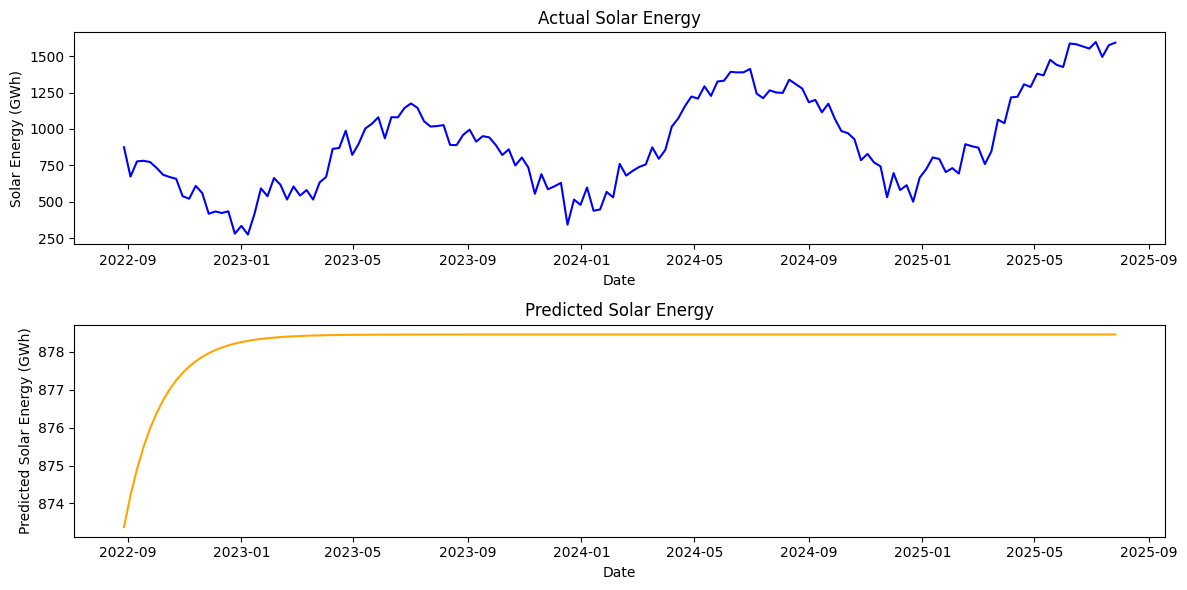

In [43]:
# Fit an auto_arima model to the solar training data
solar_arima_model = auto_arima(
    solar_train["Solar"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    # information_criterion='aicc',
    # start_p=1, start_q=0,            # lower bounds
    # max_p=4,  max_q=4,               # let it explore more AR & MA lags
    # start_P=1, start_Q=0,
    # max_P=4,  max_Q=3,
    # d=None,  D=None,
    # # stepwise=False
)
print(solar_arima_model.summary())
predicted_values = solar_arima_model.predict(n_periods=len(solar_test))
actual_values = solar_test['Solar']
mape_solar = calculate_mape(actual_values, predicted_values)
print(mape_solar)
# Create two separate plots for actual and predicted solar data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual sales data scatter plot
axes[0].plot(solar_test['Week_Start'], actual_values, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Solar Energy (GWh)')
axes[0].set_title('Actual Solar Energy')

# Predicted sales data scatter plot
axes[1].plot(solar_test['Week_Start'], predicted_values, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted Solar Energy (GWh)')
axes[1].set_title('Predicted Solar Energy')

# Adjust layout and display plots
plt.tight_layout()
plt.show()

In [37]:
# Extract the parameters
p, d, q = solar_arima_model.order
P, D, Q, s = solar_arima_model.seasonal_order

print(f"The ARIMA parameters are p = {p}, d = {d}, q = {q}")
print(f"The seasonal ARIMA parameters are P = {P}, D = {D}, Q = {Q}")

The ARIMA parameters are p = 1, d = 1, q = 2
The seasonal ARIMA parameters are P = 0, D = 0, Q = 0


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization an

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=3693.696, Time=2.83 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=4129.528, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=3700.667, Time=0.76 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=3879.987, Time=0.73 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=5198.392, Time=0.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,1)[52] intercept   : AIC=3696.890, Time=1.55 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,0)[52] intercept   : AIC=inf, Time=2.06 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,1)[52] intercept   : AIC=3692.127, Time=9.77 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,0)[52] intercept   : AIC=inf, Time=14.42 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(2,0,2)[52] intercept   : AIC=inf, Time=12.42 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(1,0,2)[52] intercept   : AIC=3691.922, Time=11.42 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,2)[52] intercept   : AIC=3693.795, Time=6.12 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,2)[52] intercept   : AIC=3692.059, Time=6.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,2)[52] intercept   : AIC=3691.039, Time=8.04 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,2)[52] intercept   : AIC=3692.305, Time=3.91 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(1,0,1)[52] intercept   : AIC=3694.044, Time=2.38 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,2)[52] intercept   : AIC=inf, Time=9.54 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,1)[52] intercept   : AIC=3695.852, Time=0.99 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,1)[52] intercept   : AIC=3691.181, Time=7.25 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,2)[52] intercept   : AIC=3690.195, Time=5.56 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,2)[52] intercept   : AIC=3690.373, Time=2.49 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=3695.046, Time=1.32 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,2)[52] intercept   : AIC=inf, Time=8.80 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=3694.401, Time=0.40 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,1)[52] intercept   : AIC=3690.332, Time=5.98 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[52] intercept   : AIC=inf, Time=7.23 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,2)[52] intercept   : AIC=3697.948, Time=2.58 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,2)[52] intercept   : AIC=inf, Time=5.10 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,2)[52] intercept   : AIC=inf, Time=9.13 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,2)[52] intercept   : AIC=3689.265, Time=5.89 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,2)[52] intercept   : AIC=3691.416, Time=3.11 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=3692.832, Time=1.47 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,2)[52] intercept   : AIC=inf, Time=9.07 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=3694.279, Time=0.43 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,1)[52] intercept   : AIC=3689.401, Time=5.70 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,0)(1,0,2)[52] intercept   : AIC=3689.413, Time=7.76 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,2)[52] intercept   : AIC=3688.279, Time=10.09 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,2)[52] intercept   : AIC=3694.242, Time=5.57 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,1)[52] intercept   : AIC=3690.677, Time=2.63 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(2,0,2)[52] intercept   : AIC=inf, Time=11.61 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(0,0,1)[52] intercept   : AIC=3697.671, Time=1.48 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(2,0,1)[52] intercept   : AIC=3688.599, Time=10.66 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,1)(1,0,2)[52] intercept   : AIC=3691.829, Time=10.94 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,2)(1,0,2)[52] intercept   : AIC=3690.079, Time=11.00 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,0)(1,0,2)[52] intercept   : AIC=3690.576, Time=8.13 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,0,2)(1,0,2)[52] intercept   : AIC=3690.998, Time=13.41 sec


/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,0,1)(1,0,2)[52]             : AIC=inf, Time=8.76 sec

Best model:  ARIMA(3,0,1)(1,0,2)[52] intercept
Total fit time: 277.217 seconds
                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  266
Model:             SARIMAX(3, 0, 1)x(1, 0, [1, 2], 52)   Log Likelihood               -1835.140
Date:                                 Sun, 03 Aug 2025   AIC                           3688.279
Time:                                         21:33:22   BIC                           3720.531
Sample:                                              0   HQIC                          3701.236
                                                 - 266                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------

/Users/shane/Documents/MIT 2025-2026/Summer/15.066 System Optimization and Analysis for Operations/15066_final_project/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


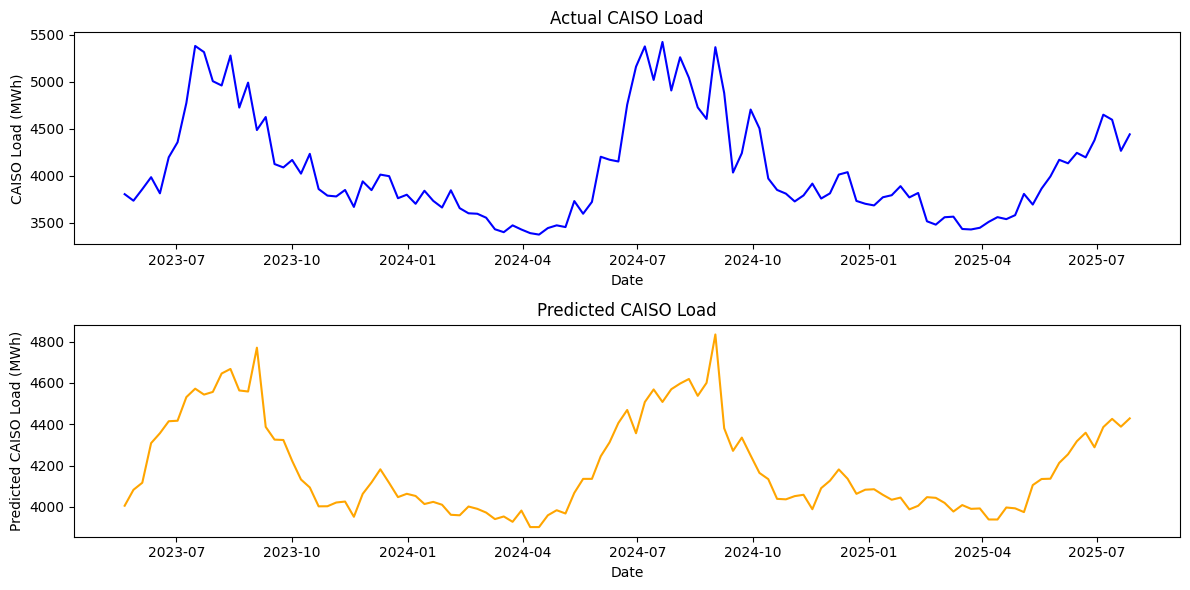

In [21]:
# Fit an auto_arima model to the load training data
load_arima_model = auto_arima(
    load_train["CAISO_Load_GWh"],
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)
print(load_arima_model.summary())
predicted_load = load_arima_model.predict(n_periods=len(load_test))
actual_load = load_test['CAISO_Load_GWh']
mape_load = calculate_mape(actual_load, predicted_load)
print(mape_load)
# Create two separate plots for actual and predicted load data
fig, axes = plt.subplots(2, 1, figsize=(12, 6))

# Actual load data plot
axes[0].plot(load_test['Week_Start'], actual_load, color='blue')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('CAISO Load (MWh)')
axes[0].set_title('Actual CAISO Load')

# Predicted load data plot
axes[1].plot(load_test['Week_Start'], predicted_load, color='orange')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Predicted CAISO Load (MWh)')
axes[1].set_title('Predicted CAISO Load')

plt.tight_layout()
plt.show()


In [32]:
import pickle

# Save the ARIMA models to files
with open('load_arima_model.pkl', 'wb') as f:
    pickle.dump(load_arima_model, f)